In [9]:
!pip install chart_studio

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [11]:
tesla = pd.read_csv('/content/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [12]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [13]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-13-484d0f65faac>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [14]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [15]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

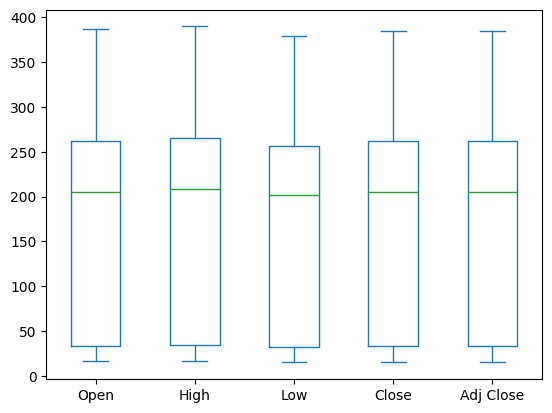

In [16]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [17]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [18]:
#plot(plot) #plotting offline
iplot(plot)

In [19]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [20]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [21]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [24]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [25]:
iplot(plot2)

In [26]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



In [27]:
# Accuracy
import numpy as np
# Assuming you want to calculate the accuracy as 1 - (MSE / variance of test data)
accuracy = 1 - (mse(Y_test, lm.predict(X_test)) / np.var(Y_test))
print("Accuracy:", accuracy)


Accuracy: 0.8610649253244574


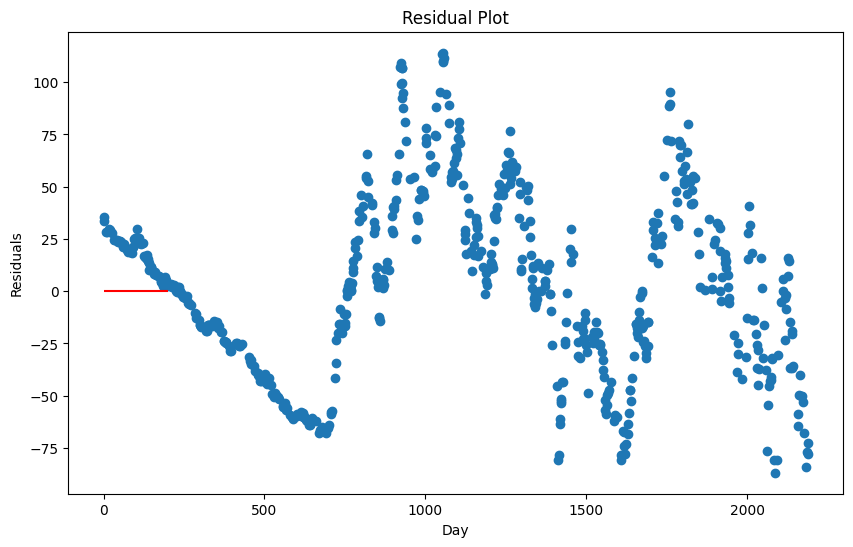

In [28]:
#Plot actual and predicted values for test dataset
trace0 = go.Scatter(
    x = X_test.T[0],
    y = Y_test,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_test.T[0],
    y = lm.predict(X_test).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot3 = go.Figure(data=tesla_data, layout=layout)
iplot(plot3)

#Plot residuals
residuals = Y_test - lm.predict(X_test).T
plt.figure(figsize=(10,6))
plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin=0, xmax=200, color='red')
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


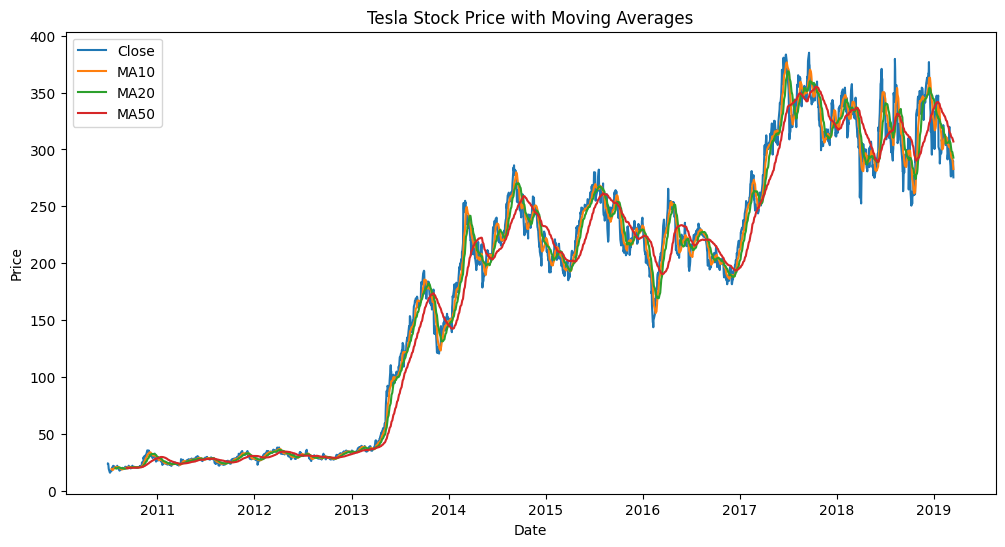

In [29]:
import matplotlib.pyplot as plt
# Calculate moving averages
tesla['MA10'] = tesla['Close'].rolling(window=10).mean()
tesla['MA20'] = tesla['Close'].rolling(window=20).mean()
tesla['MA50'] = tesla['Close'].rolling(window=50).mean()

# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Close'], label='Close')
plt.plot(tesla['Date'], tesla['MA10'], label='MA10')
plt.plot(tesla['Date'], tesla['MA20'], label='MA20')
plt.plot(tesla['Date'], tesla['MA50'], label='MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price with Moving Averages')
plt.legend()
plt.show()

In [30]:
# Calculate price differences
delta = tesla['Close'].diff()
delta = delta[1:]  # Remove the first NaN value

# Separate gains and losses
up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

# Calculate exponential moving averages (EMA)
window_length = 14
roll_up = up.ewm(com=window_length - 1, adjust=False).mean()
roll_down = down.ewm(com=window_length - 1, adjust=False).mean()

# Calculate RSI
rs = roll_up / roll_down
rsi = 100.0 - (100.0 / (1.0 + rs))

# Add RSI to the DataFrame
tesla['RSI'] = rsi
print(tesla['RSI'])

0             NaN
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
2188    45.445227
2189    41.859501
2190    45.302270
2191    45.918123
2192    39.040028
Name: RSI, Length: 2193, dtype: float64


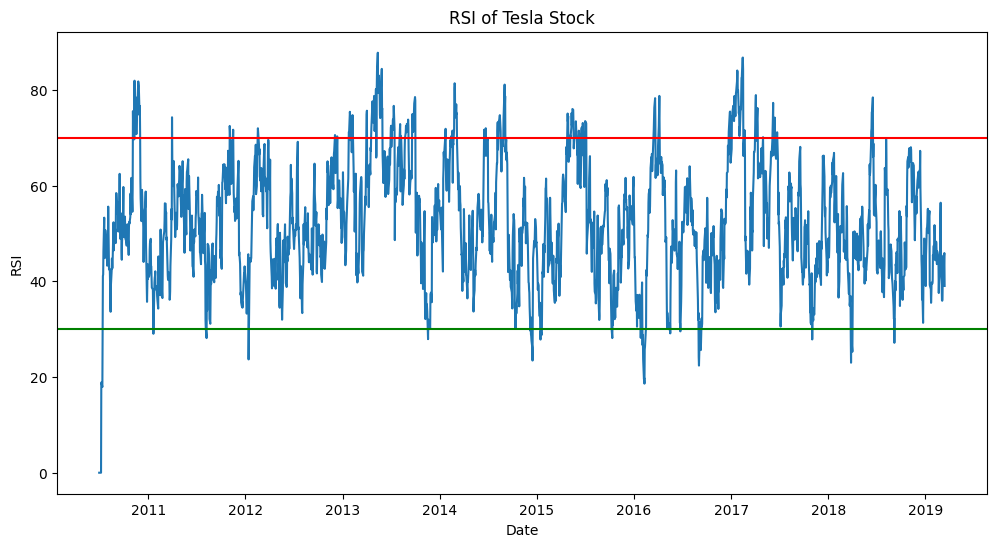

In [31]:
# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['RSI'])
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI of Tesla Stock')
plt.axhline(y=70, color='r', linestyle='-')  # Overbought threshold
plt.axhline(y=30, color='g', linestyle='-')  # Oversold threshold
plt.show()

# USing RNN

**Spliting Data as Train and Validation**

In [32]:
length_data = len(tesla)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2193
Train data length : 1535
Validation data lenth : 658


In [33]:
train_data = tesla[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1530,2016-07-27,229.339996
1531,2016-07-28,227.949997
1532,2016-07-29,230.699997
1533,2016-08-01,235.500000


In [34]:
validation_data = tesla[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1535,2016-08-03,227.369995
1536,2016-08-04,225.690002
1537,2016-08-05,230.000000
1538,2016-08-08,228.000000
1539,2016-08-09,226.820007
...,...,...
2188,2019-03-11,283.519989
2189,2019-03-12,286.489990
2190,2019-03-13,283.899994
2191,2019-03-14,292.450012


# Creating Train Dataset from Train split


* We will get Open column as our dataset
* Dataset to be converted to array by adding .values







In [35]:
dataset_train = train_data.Open.values
dataset_train.shape

(1535,)

In [36]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1535, 1)

# Normalization / Feature Scaling

Dataset values will be in between 0 and 1 after scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1535, 1)

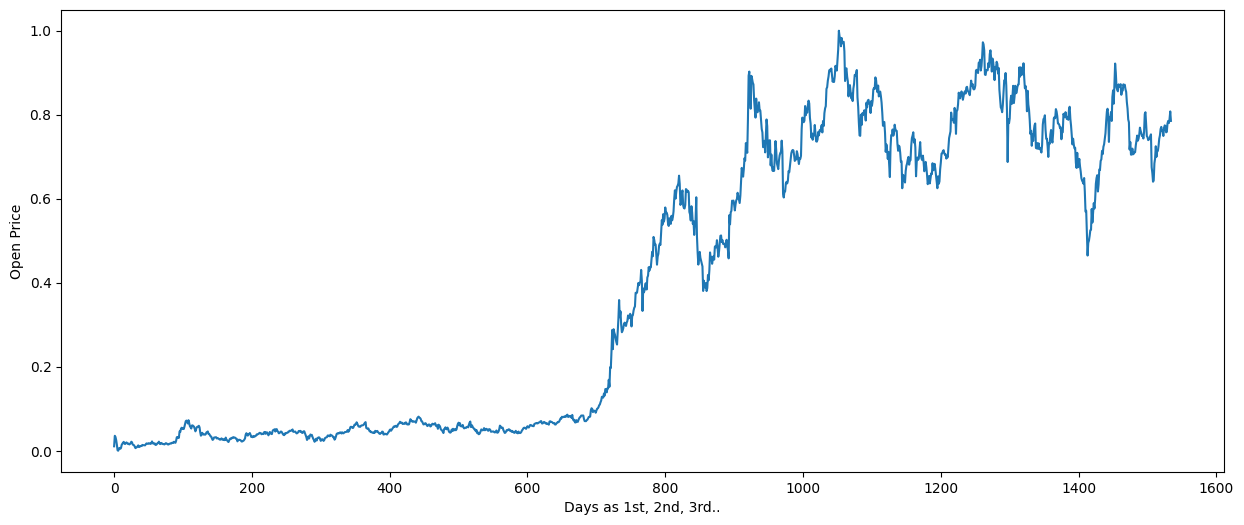

In [38]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

# Creating X_train and y_train from Train data

In [39]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1485, 50)
Shape of y_train before reshape : (1485,)


# Reshaping

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1485, 50, 1)
Shape of y_train after reshape : (1485, 1)


Shape of X_train : 1134 x 50 x 1
That means we have 1134 rows, each row has 50 rows and 1 column
Lets check the first row: it has 50 rows (open prices of 49 days)

In [42]:
X_train[0]


array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [43]:
y_train[0]

array([0.01789858])

In [44]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )
regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
47/47 [==============================] - 17s 104ms/step - loss: 0.4369 - accuracy: 6.7340e-04
Epoch 2/50
47/47 [==============================] - 5s 108ms/step - loss: 0.2731 - accuracy: 6.7340e-04
Epoch 3/50
47/47 [==============================] - 6s 135ms/step - loss: 0.1554 - accuracy: 6.7340e-04
Epoch 4/50
47/47 [==============================] - 5s 109ms/step - loss: 0.1177 - accuracy: 0.0000e+00
Epoch 5/50
47/47 [==============================] - 2s 48ms/step - loss: 0.0923 - accuracy: 0.0000e+00
Epoch 6/50
47/47 [==============================] - 3s 74ms/step - loss: 0.0736 - accuracy: 6.7340e-04
Epoch 7/50
47/47 [==============================] - 3s 60ms/step - loss: 0.0570 - accuracy: 6.7340e-04
Epoch 8/50
47/47 [==============================] - 2s 48ms/step - loss: 0.0501 - accuracy: 6.7340e-04
Epoch 9/50
47/47 [==============================] - 2s 47ms/step - loss: 0.0403 - accuracy: 6.7340e-04
Epoch 10/50
47/47 [==============================] - 2s 47ms/step - 

# Evaluating model

In [45]:
# Losses
history.history["loss"]

[0.4368513822555542,
 0.27309364080429077,
 0.1554168164730072,
 0.11767277121543884,
 0.09232879430055618,
 0.07356967031955719,
 0.057019464671611786,
 0.05013352632522583,
 0.0402776338160038,
 0.034907758235931396,
 0.03374028950929642,
 0.03155859559774399,
 0.026397880166769028,
 0.02631697803735733,
 0.020783990621566772,
 0.020283520221710205,
 0.01864701509475708,
 0.016196640208363533,
 0.016759704798460007,
 0.014209258370101452,
 0.013855712488293648,
 0.014025302603840828,
 0.010884939692914486,
 0.01081737969070673,
 0.011152198538184166,
 0.011107619851827621,
 0.009884108789265156,
 0.009094077162444592,
 0.008375968784093857,
 0.007554380688816309,
 0.007653177250176668,
 0.007376175839453936,
 0.00687283044680953,
 0.00647446233779192,
 0.006605763453990221,
 0.006472235545516014,
 0.006921233143657446,
 0.006051958538591862,
 0.0054287388920784,
 0.005486220587044954,
 0.004884691908955574,
 0.005396306049078703,
 0.005085477139800787,
 0.004764027427881956,
 0.00485

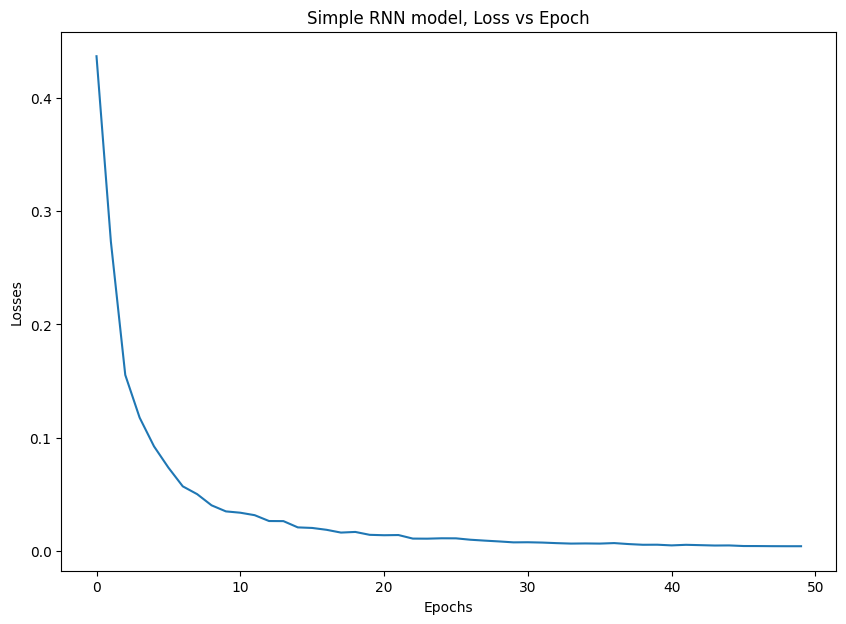

In [46]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

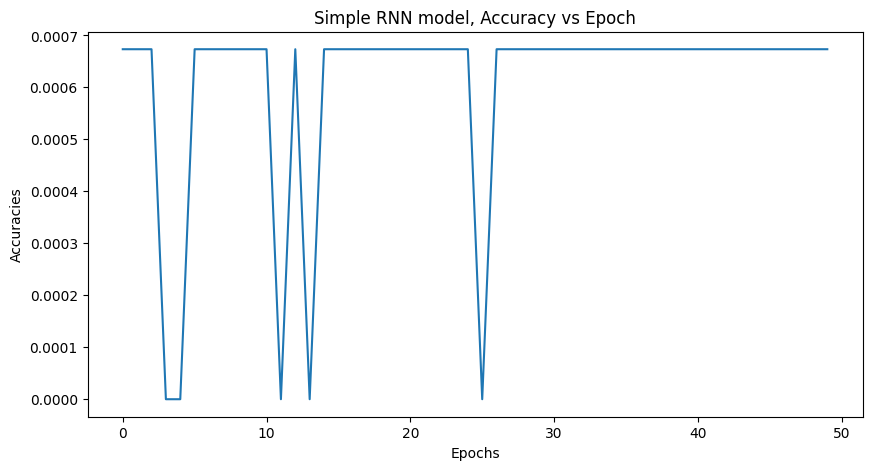

In [47]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

# Model predictions for training data

In [48]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

47/47 [==============================] - 1s 14ms/step


(1485, 1)

In [49]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1485, 1)

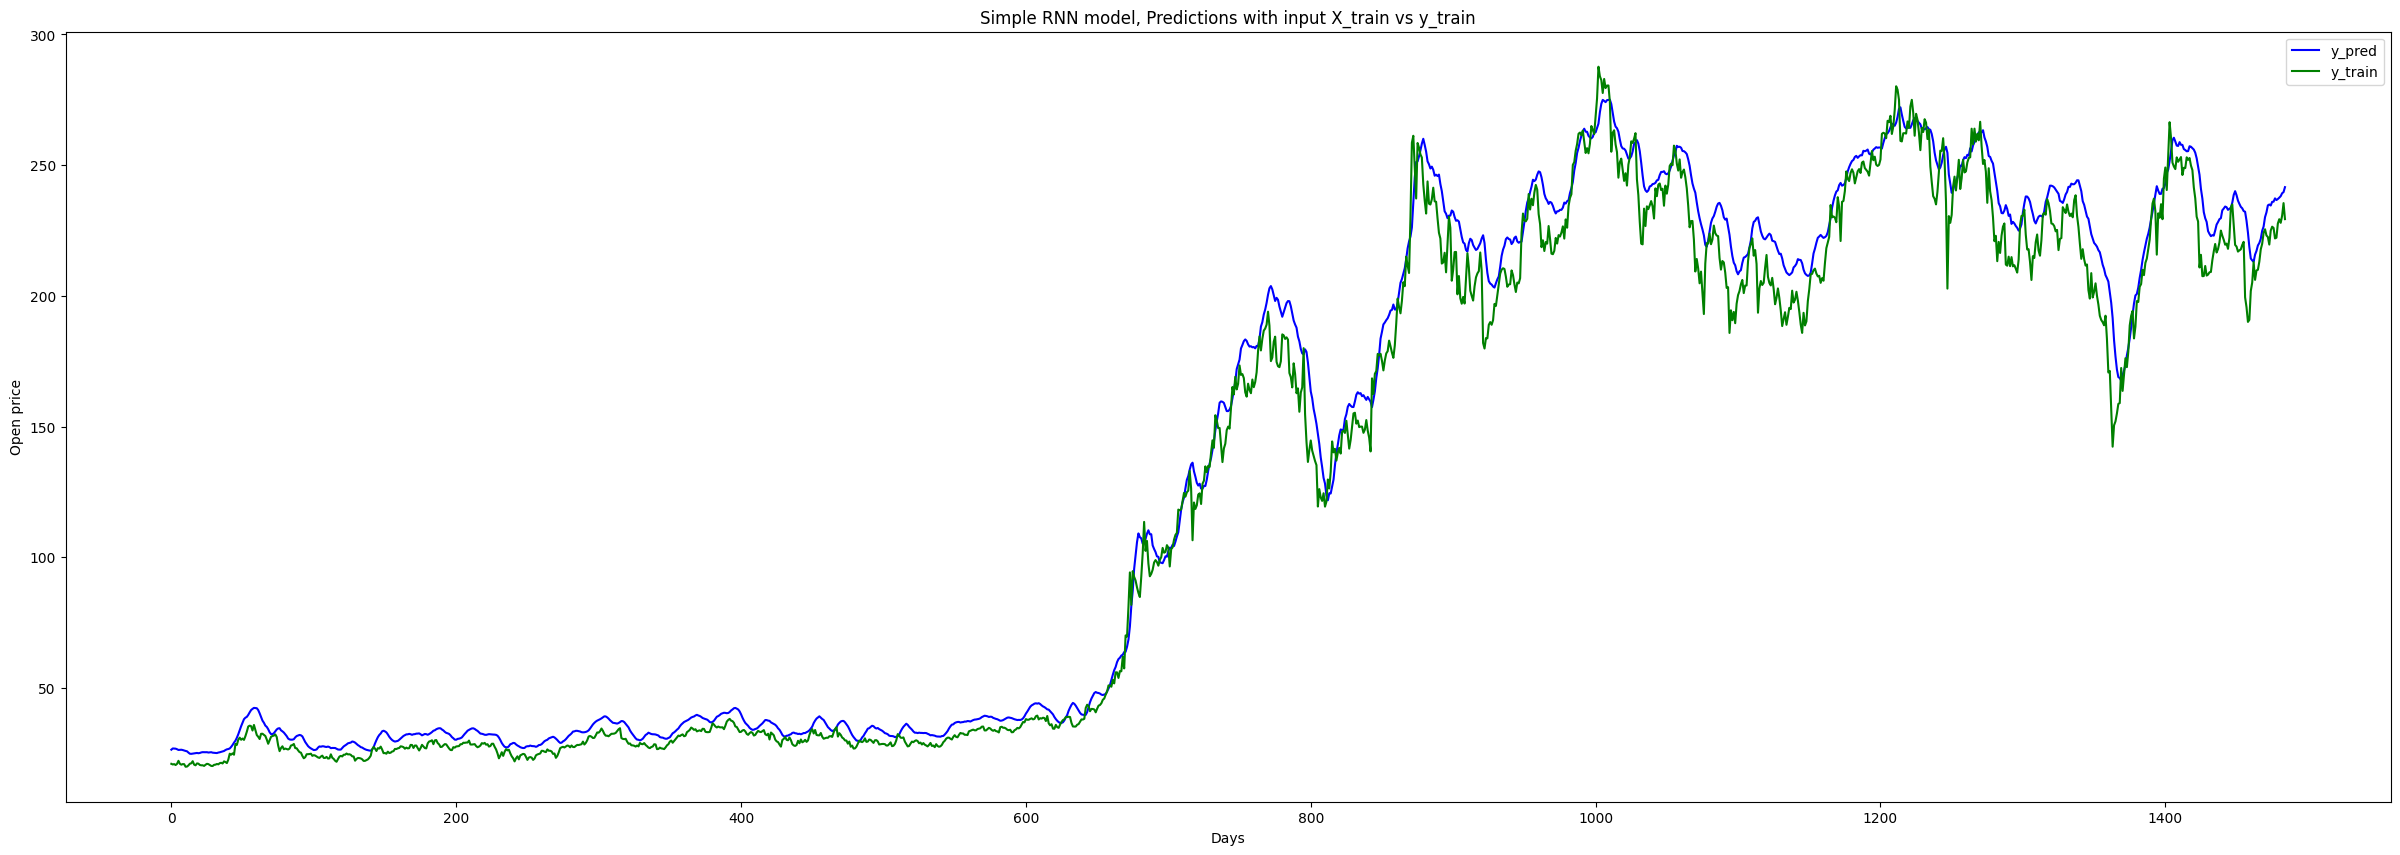

In [50]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    """
    Calculates Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        A dictionary containing the MSE, RMSE, and MAE values.
    """

    mse_value = mean_squared_error(y_true, y_pred)
    rmse_value = np.sqrt(mse_value)
    mae_value = mean_absolute_error(y_true, y_pred)

    return {
        "MSE": mse_value,
        "RMSE": rmse_value,
        "MAE": mae_value
    }

# Example usage:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

metrics = calculate_metrics(y_true, y_pred)
print(metrics)

{'MSE': 0.375, 'RMSE': 0.6123724356957945, 'MAE': 0.5}


In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse # import the function

# Assuming you have defined y_train and y_pred in previous cells
# If not, you need to define and populate them before this code
train_accuracy = 1 - (mse(y_train, y_pred) / np.var(y_train))
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9868018665298801
